# 카이제곱분석

Chi-Square Statistic: 209.6332877186697
P-value: 1.6858802197805568e-42
Degrees of Freedom: 6
Expected Frequencies:
[[1290.86788009  925.71620271  551.22027123  409.33276231  354.80949322
   467.66630978  194.68708066]
 [ 132.03211991   94.68379729   56.37972877   41.86723769   36.29050678
    47.83369022   19.91291934]]
업체와 채용공고 간에는 특정 기술이 등장하는 빈도의 차이가 있다.즉 둘의 선호도가 다를 수 있다


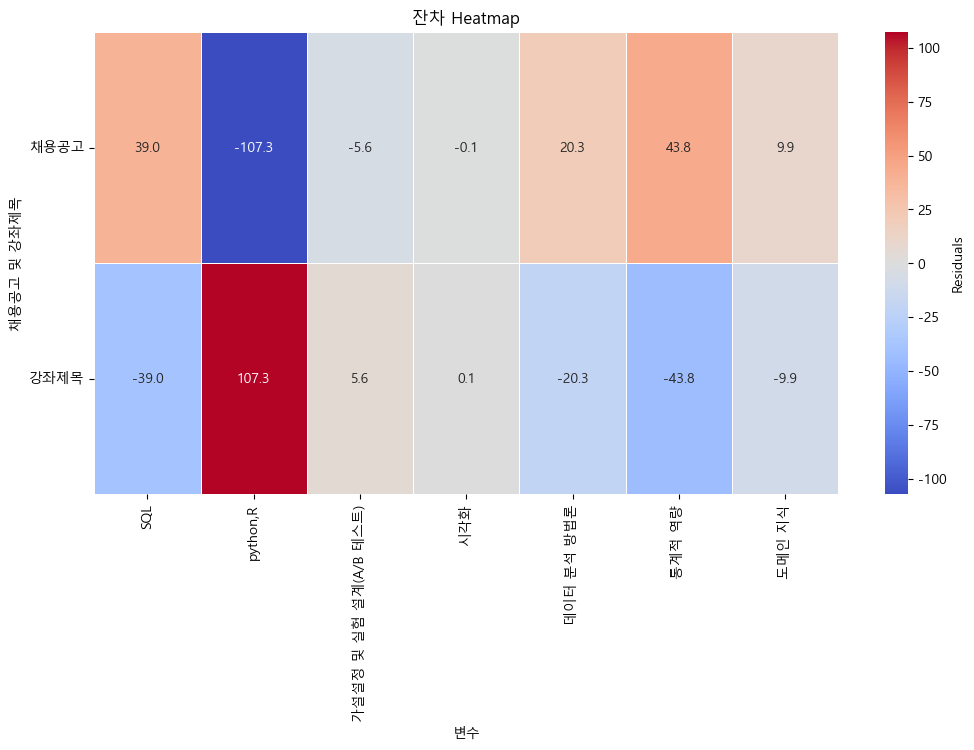

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
df = pd.read_excel("데이터리안자료.xlsx",sheet_name = 'asd')
df2=pd.read_csv("추출단어정리.csv")
df2 = df2.groupby("word",as_index = False).agg({"count":"sum"})
df2 = df2.sort_values(by="count",ascending = False)

카이제곱데이터리안 = df[['삭제후','빈도']]
카이제곱데이터리안 = 카이제곱데이터리안.loc[0:6,:]

#패캠 77개 스파르타코딩 11개 인프런1277
df2["count/34.1"]=df2['count']/34.1
df2["count/34.1"]=round(df2["count/34.1"])

pd.set_option('display.max_rows', None)

# 가상의 데이터 생성 빈도 5 아래로 떨어뜨리기 싫어서 카이제곱데이터리안데이터 *34.1
data = {
    'SQL': [39*34.1, 93],
    'python,R': [24*34.1, 168+34],
    '가설설정 및 실험 설계(A/B 테스트)': [16*34.1, 62],#논문, 프로젝트 등의 가설설정과 실험설계가 필요한 파트
    '시각화': [12*34.1, 42],#시각화툴도 포함한다는 가정
    "데이터 분석 방법론":[11*34.1,16],#딥러닝+머신러닝+자연어 등
    "통계적 역량":[15*34.1,4],#통계,수학,빅데이터등의 키워드
    "도메인 지식":[6*34.1,10],#금융,부동산 ,도매인등의 키워드
    
}
#데이터는카이제곱데이터리안이랑데이터는 count/34.1을 이용
# 데이터프레임 생성
dff = pd.DataFrame(data, index=['채용공고', '강좌제목'])

# 카이제곱 검정 수행
chi2_stat, p_val, dof, expected = chi2_contingency(dff)
\
# observed 정의
observed = dff.to_numpy()

# 잔차 계산
residuals = observed - expected

# 결과 출력
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# P-value를 통해 유의미한 차이가 있는지 확인
if p_val < 0.05:
    print("업체와 채용공고 간에는 특정 기술이 등장하는 빈도의 차이가 있다.즉 둘의 선호도가 다를 수 있다")
else:
    print("업체와 채용공고 간에는 특정 기술이 등장하는 빈도의 차이가 없다.")

#관련이없다의 주장은 많은 근거가 필요하다.
    
###모집단갯수는 그냥 곱하면 되는가?
###귀무:차이없다 대립:차이잇다

# 시각화
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
plt.figure(figsize=(12, 6))
sns.heatmap(residuals, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5, cbar_kws={'label': 'Residuals'})

# x축, y축 눈금 중앙에 위치하도록 설정
plt.xticks(ticks=[i + 0.5 for i in range(len(dff.columns))], labels=dff.columns, rotation=90)
plt.yticks(ticks=[i + 0.5 for i in range(len(dff.index))], labels=dff.index, rotation=0)

plt.title("잔차 Heatmap")
plt.xlabel("변수")
plt.ylabel("채용공고 및 강좌제목")
plt.savefig('visualization.png', bbox_inches='tight') 
plt.show()

##해석
##그림에 나온 숫자들은 기대값-관측가
